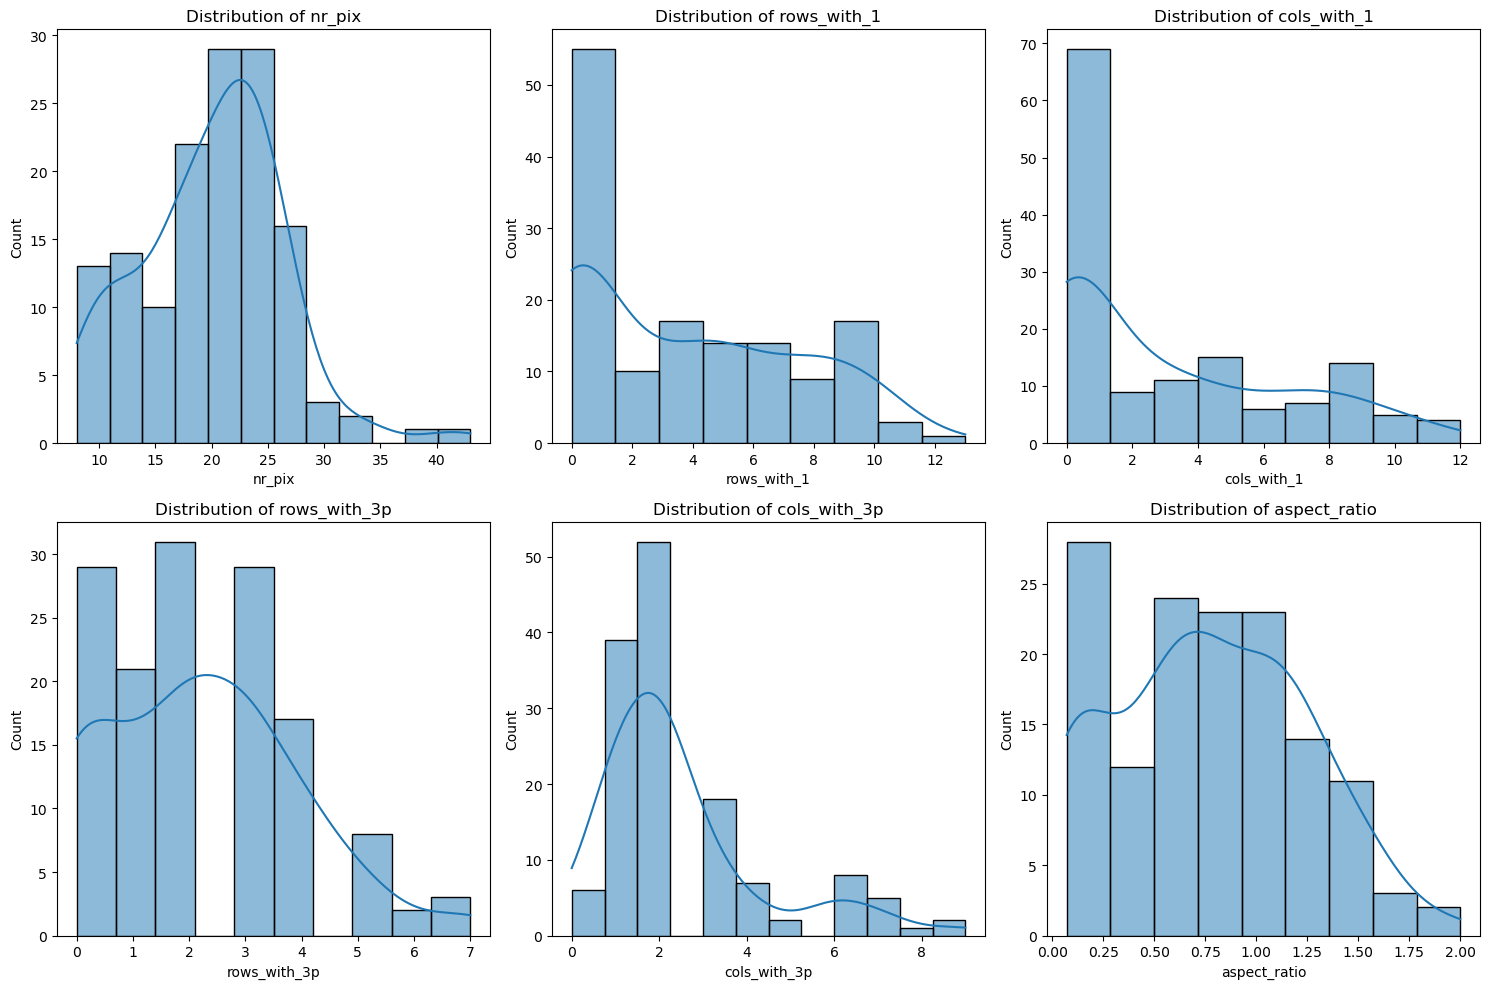

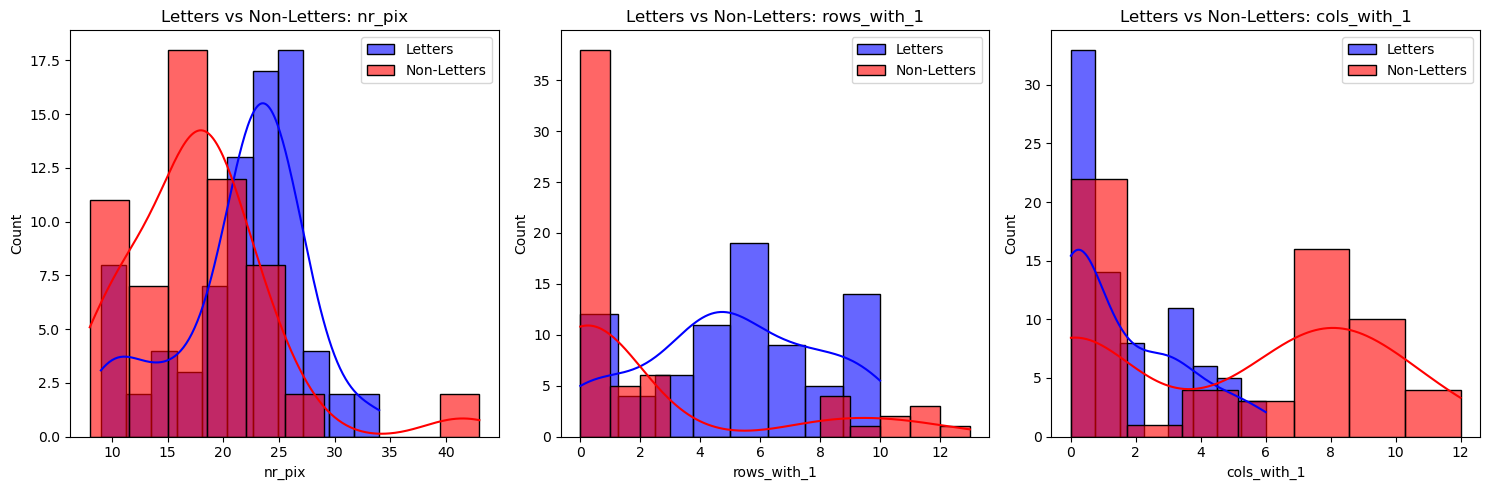

Summary statistics for letters:
           nr_pix  rows_with_1  cols_with_1  rows_with_3p  cols_with_3p  \
mean    21.762500     5.112500     1.625000      2.687500      2.975000   
median  23.000000     5.000000     1.000000      3.000000      2.000000   
std      5.726341     2.972421     1.823719      1.665691      2.068296   

        aspect_ratio   neigh_1  no_neigh_above  no_neigh_below  no_neigh_left  \
mean        0.697890  1.800000        6.900000        7.200000       8.562500   
median      0.700000  1.500000        6.000000        7.000000       9.000000   
std         0.326133  1.036059        3.612916        3.688504       3.426789   

        no_neigh_right  no_neigh_horiz  no_neigh_vert  connected_areas  \
mean          8.700000       10.187500       9.275000         1.200000   
median        9.000000       10.000000       9.500000         1.000000   
std           3.227257        3.479028       5.312929         0.402524   

           eyes    custom  
mean    0.02500  

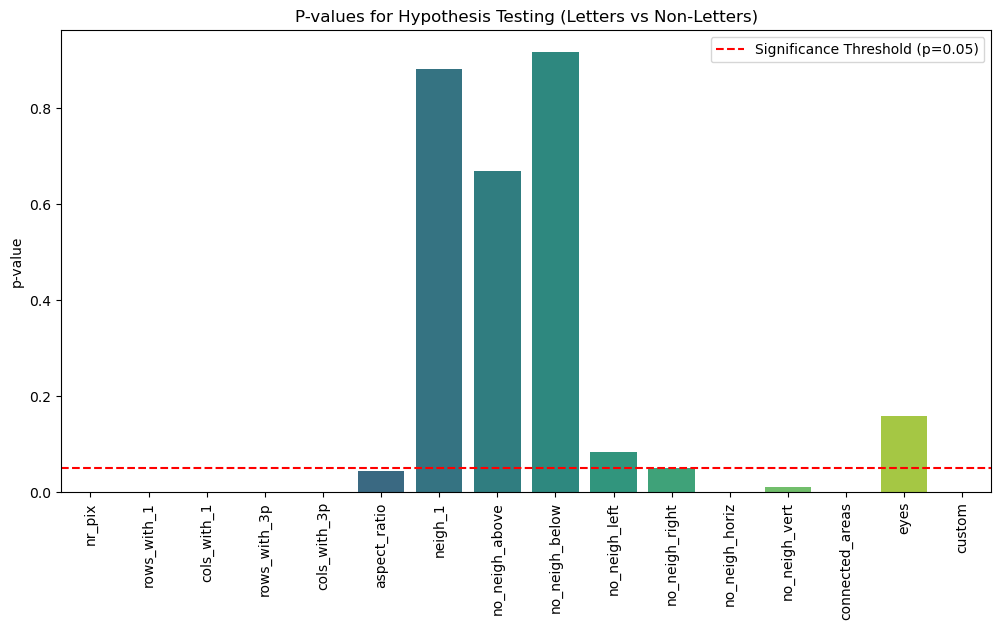

Statistically significant features (p < 0.05):
 - nr_pix
 - rows_with_1
 - cols_with_1
 - rows_with_3p
 - cols_with_3p
 - aspect_ratio
 - no_neigh_right
 - no_neigh_horiz
 - no_neigh_vert
 - connected_areas
 - custom


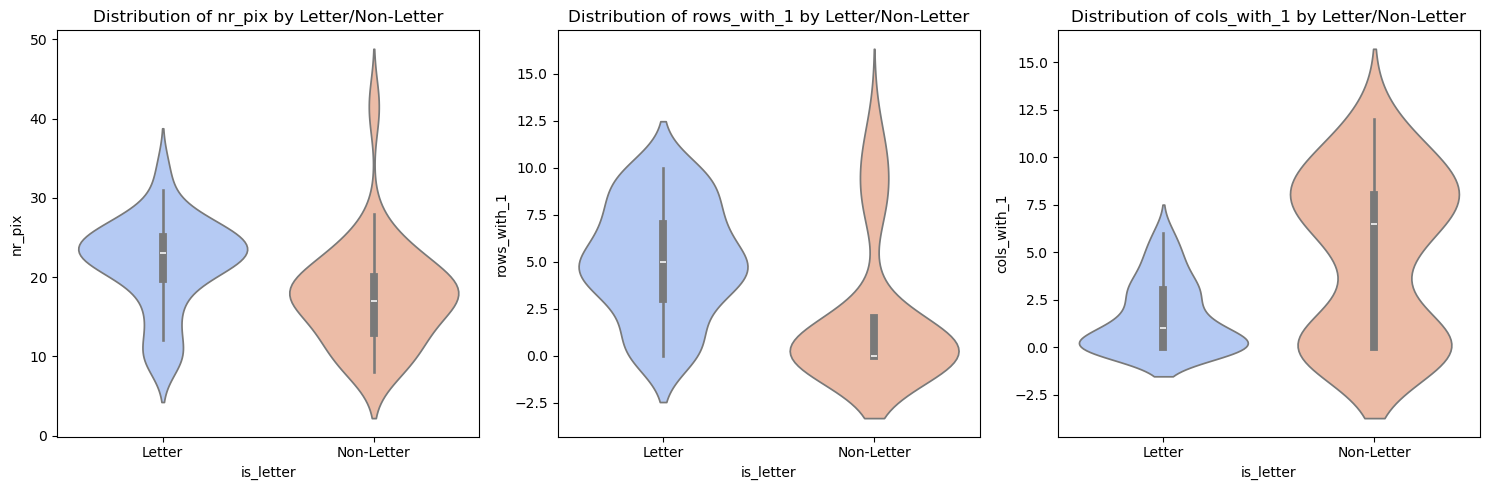

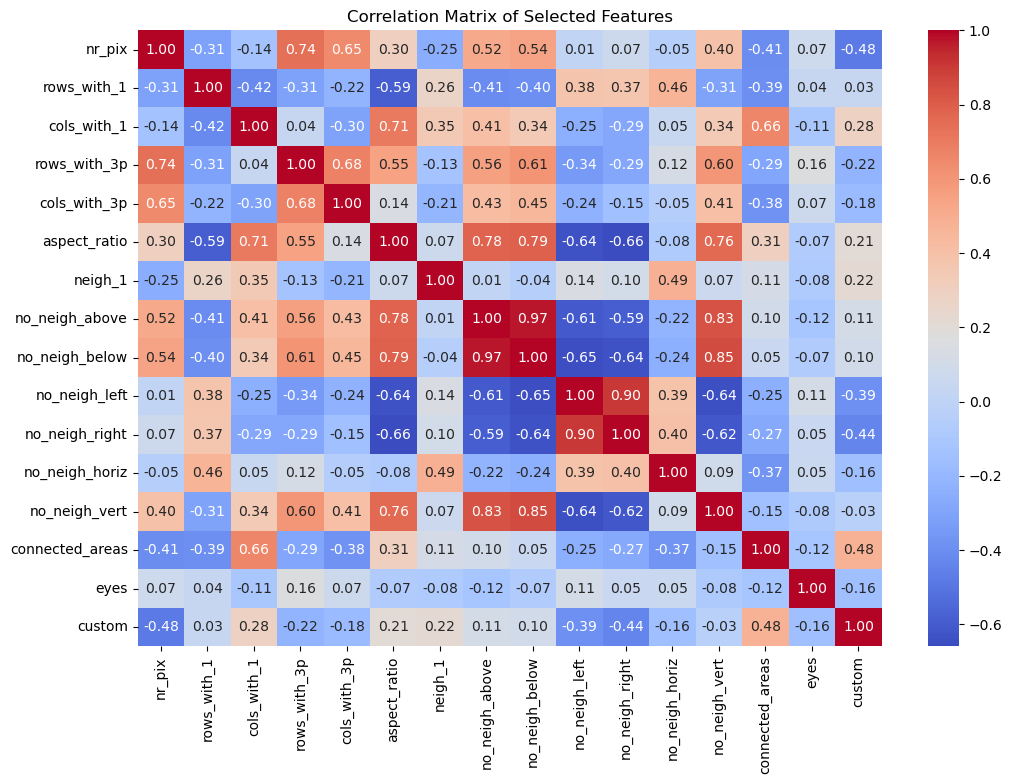

In [5]:
import pandas as pd  # Reference: https://pandas.pydata.org/docs/
import numpy as np  # Reference: https://numpy.org/doc/
import matplotlib.pyplot as plt  # Reference: https://matplotlib.org/
import seaborn as sns  # Reference: https://seaborn.pydata.org/
from scipy.stats import ttest_ind, pearsonr  # Reference: https://docs.scipy.org/doc/scipy/reference/stats.html

# Load the feature data
features_df = pd.read_csv("40415474_features.csv")

# Features to analyze (expand this list to 16 features)
selected_features = [
    "nr_pix", "rows_with_1", "cols_with_1", "rows_with_3p", "cols_with_3p", "aspect_ratio",
    "neigh_1", "no_neigh_above", "no_neigh_below", "no_neigh_left", "no_neigh_right", "no_neigh_horiz",
    "no_neigh_vert", "connected_areas", "eyes", "custom"
]

# Task 1: Histograms for the first six features (keep 6 for visualization)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features[:6]):  # Only plot the first 6 features
    plt.subplot(2, 3, i + 1)
    sns.histplot(features_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Task 1b: Histograms for letters vs non-letters for the first three features
valid_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Filter letters and non-letters based on the condition
letters_df = features_df[features_df['label'].isin(valid_letters)]  
non_letters_df = features_df[~features_df['label'].isin(valid_letters)]  

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features[:3]):  # First 3 features
    plt.subplot(1, 3, i + 1)
    sns.histplot(letters_df[feature], kde=True, color="blue", label="Letters", alpha=0.6)
    sns.histplot(non_letters_df[feature], kde=True, color="red", label="Non-Letters", alpha=0.6)
    plt.title(f"Letters vs Non-Letters: {feature}")
    plt.legend()
plt.tight_layout()
plt.show()

# Task 2: Summary statistics for letters and non-letters
# Compute summary statistics for both subsets
summary_letters = letters_df[selected_features].agg(['mean', 'median', 'std'])
summary_non_letters = non_letters_df[selected_features].agg(['mean', 'median', 'std'])

print("Summary statistics for letters:")
print(summary_letters)

print("Summary statistics for non-letters:")
print(summary_non_letters)

# Task 3: Hypothesis testing for letters vs non-letters
significant_features = []
p_values = []

for feature in selected_features:
    t_stat, p_value = ttest_ind(letters_df[feature], non_letters_df[feature], equal_var=False)
    p_values.append(p_value)
    if p_value < 0.05:
        significant_features.append(feature)
    print(f"{feature} is significant (p-value = {p_value:.5f})")

# Plot the p-values as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=p_values, hue=selected_features, palette="viridis", legend=False)
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')
plt.xticks(rotation=90)
plt.ylabel('p-value')
plt.title('P-values for Hypothesis Testing (Letters vs Non-Letters)')
plt.legend()
plt.show()

# Highlight statistically significant features
print("Statistically significant features (p < 0.05):")
for feature in significant_features:
    print(f" - {feature}")


features_df['is_letter'] = np.where(features_df['label'].isin(valid_letters), 'Letter', 'Non-Letter')

# Task 6: Violin plots for each feature comparing letters vs non-letters
plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features[:3]):  # Only the first 3 features
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x='is_letter', y=feature, data=features_df, hue='is_letter', palette='coolwarm', legend=False)
    plt.title(f"Distribution of {feature} by Letter/Non-Letter")
plt.tight_layout()
plt.show()


# Task 4: Correlation analysis
correlation_matrix = features_df[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()






